### 딥러닝 라이브러리
- tensorflow
- keras

In [1]:
from tensorflow.keras.datasets import mnist # 손글씨데이터

In [3]:
(X_train,y_train),(X_test,y_test) = mnist.load_data()

In [4]:
X_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [5]:
X_test.shape, y_test.shape

((10000, 28, 28), (10000,))

In [6]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [7]:
# matplotlib로 시각화하기
import matplotlib.pyplot as plt

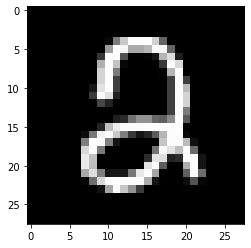

In [11]:
plt.imshow(X_train[7986], cmap='gray')
plt.show()

In [12]:
y_train[7986]

2

### 모델링

In [13]:
from tensorflow.keras.models import Sequential # 딥러닝 모델의 뼈대

In [16]:
from tensorflow.keras.layers import InputLayer, Dense # 입력층, 중간/출력층

In [17]:
# 모델정의
model = Sequential() # 딥러닝 모델의 뼈대 생성
model.add(InputLayer(input_shape=(784,))) # 입력층 추가
model.add(Dense(units=20, activation='sigmoid')) # 중간층 추가
model.add(Dense(units=40, activation='sigmoid')) # 중간층 추가
model.add(Dense(units=30, activation='sigmoid')) # 중간층 추가
model.add(Dense(units=10, activation='softmax')) # 출력층 추가 (10개의 확률)

In [19]:
# 모델학습
# 1. 모델의 학습방법 및 평가방법 설정
model.compile(loss='sparse_categorical_crossentropy',
             optimizer="Adam",
             metrics=['accuracy'])
# 2. 모델학습
model.fit(X_train.reshape(60000,784),y_train,epochs=50)

Epoch 1/50
1875/1875 [==============================] - 1s 463us/step - loss: 1.1961 - accuracy: 0.6561
Epoch 2/50
1875/1875 [==============================] - 1s 464us/step - loss: 0.6200 - accuracy: 0.8109
Epoch 3/50
1875/1875 [==============================] - 1s 463us/step - loss: 0.5324 - accuracy: 0.8353
Epoch 4/50
1875/1875 [==============================] - 1s 462us/step - loss: 0.5010 - accuracy: 0.8451
Epoch 5/50
1875/1875 [==============================] - 1s 471us/step - loss: 0.4740 - accuracy: 0.8563
Epoch 6/50
1875/1875 [==============================] - 1s 464us/step - loss: 0.4464 - accuracy: 0.8627
Epoch 7/50
1875/1875 [==============================] - 1s 472us/step - loss: 0.4351 - accuracy: 0.8671
Epoch 8/50
1875/1875 [==============================] - 1s 478us/step - loss: 0.3996 - accuracy: 0.8783
Epoch 9/50
1875/1875 [==============================] - 1s 467us/step - loss: 0.3977 - accuracy: 0.8798
Epoch 10/50
1875/1875 [==============================] - 1s 466u

In [20]:
# 모델 예측
pre = model.predict(X_test.reshape(10000,784))

In [23]:
pre.shape

(10000, 10)

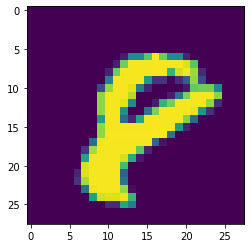

In [27]:
plt.imshow(X_test[242])
plt.show()

In [28]:
pre[242]

array([4.1818242e-03, 2.3292220e-04, 2.4199483e-03, 1.8610219e-03,
       4.9759063e-04, 1.6626011e-03, 2.2723296e-04, 2.6896098e-04,
       9.6483707e-01, 2.3810780e-02], dtype=float32)

In [31]:
# 모델 평가
pre_classes = pre.argmax(axis=1)

In [32]:
pre_classes

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [33]:
!pip install sklearn

  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1310 sha256=111fb316f92bedbb65b359e48c29f4fb3fdbb8ad166ee3db254cfeb3ec6b80cc
  Stored in directory: c:\users\smhrd\appdata\local\pip\cache\wheels\46\ef\c3\157e41f5ee1372d1be90b09f74f82b10e391eaacca8f22d33e
Successfully built sklearn


In [34]:
from sklearn.metrics import accuracy_score

In [35]:
accuracy_score(y_test,pre_classes)

0.9178

In [38]:
# model내부에 평가함수
model.evaluate(X_test.reshape(10000,784),y_test)

313/313 [==============================] - 0s 421us/step - loss: 0.2717 - accuracy: 0.9178


[0.2716909945011139, 0.9178000092506409]

#### 모델저장

In [40]:
model.save('./hand_write_digit_model.h5')